In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('bank-additional.csv',delimiter=';')
df.rename(columns={'y':'deposit'}, inplace=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [8]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
deposit            object
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [11]:
df.duplicated().sum()

0

In [12]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64

In [16]:
cat_cols = list(df.select_dtypes(include='object').columns)
print(cat_cols)
num_cols = list(df.select_dtypes(exclude='object').columns)
print(num_cols)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'deposit']
<class 'list'>
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [17]:
cat_cols.remove('deposit')

In [38]:
target_var = 'deposit'

In [20]:
temp_df = df[num_cols]

                     age  duration  campaign     pdays  previous  \
age             1.000000  0.041299 -0.014169 -0.043425  0.050931   
duration        0.041299  1.000000 -0.085348 -0.046998  0.025724   
campaign       -0.014169 -0.085348  1.000000  0.058742 -0.091490   
pdays          -0.043425 -0.046998  0.058742  1.000000 -0.587941   
previous        0.050931  0.025724 -0.091490 -0.587941  1.000000   
emp.var.rate   -0.019192 -0.028848  0.176079  0.270684 -0.415238   
cons.price.idx -0.000482  0.016672  0.145021  0.058472 -0.164922   
cons.conf.idx   0.098135 -0.034745  0.007882 -0.092090 -0.051420   
euribor3m      -0.015033 -0.032329  0.159435  0.301478 -0.458851   
nr.employed    -0.041936 -0.044218  0.161037  0.381983 -0.514853   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.019192       -0.000482       0.098135  -0.015033   
duration           -0.028848        0.016672      -0.034745  -0.032329   
campaign            0.176079 

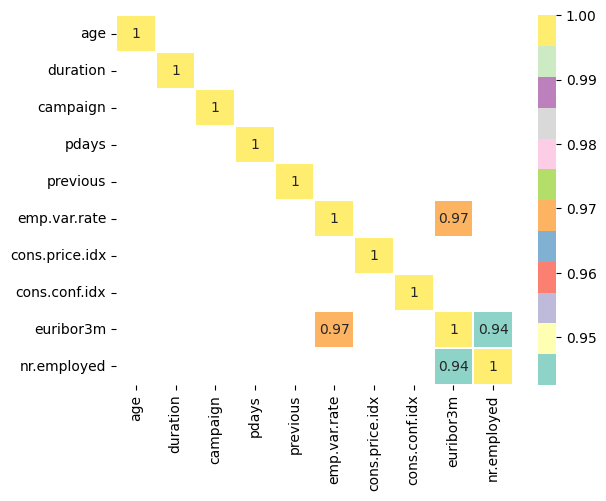

In [21]:
corr = temp_df.corr()
print(corr)
corr = corr[abs(corr)>=0.90]
sns.heatmap(corr,annot=True,cmap='Set3',linewidths=0.2)
plt.show()

In [22]:
df1 = df[cat_cols]

In [26]:
df1.shape

(4119, 10)

In [27]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(df1)

OneHotEncoder(handle_unknown='ignore')

In [31]:
temp = encoder.transform(df1)
encoded_dataframe = pd.DataFrame.sparse.from_spmatrix(temp , columns=encoder.get_feature_names_out())

In [32]:
encoded_dataframe

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4115,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4117,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [35]:
final_input = pd.concat([df[num_cols] , encoded_dataframe] , axis = 1)

In [36]:
final_input

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,-0.980752,0.903952,-0.209228,0.201031,-0.351356,-1.206054,-1.185448,-1.240939,-1.331707,-0.914779,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.107991,0.350300,0.569634,0.201031,-0.351356,0.649441,0.715193,0.892269,0.711698,0.332862,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-1.465619,-0.116966,-0.598660,0.201031,-0.351356,0.841389,1.528273,-0.283172,0.773427,0.836535,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.204965,-0.941553,0.180203,0.201031,-0.351356,0.841389,1.528273,-0.283172,0.771697,0.836535,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.667795,-0.780563,-0.598660,0.201031,-0.351356,-0.118350,-0.655478,-0.326707,0.328632,0.398028,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,-0.980752,-0.800196,-0.598660,0.201031,-0.351356,0.841389,0.583995,-0.479079,0.771120,0.836535,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4115,-0.107991,-0.148379,-0.598660,0.201031,-0.351356,0.841389,0.583995,-0.479079,0.771697,0.836535,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4116,-1.271672,-0.757003,-0.209228,0.201031,1.494607,-1.206054,-1.185448,-1.240939,-1.308054,-0.914779,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4117,1.734503,1.064943,-0.598660,0.201031,-0.351356,0.841389,-0.234264,0.957571,0.775735,0.836535,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


                           age  duration  campaign     pdays  previous  \
age                   1.000000  0.041299 -0.014169 -0.043425  0.050931   
duration              0.041299  1.000000 -0.085348 -0.046998  0.025724   
campaign             -0.014169 -0.085348  1.000000  0.058742 -0.091490   
pdays                -0.043425 -0.046998  0.058742  1.000000 -0.587941   
previous              0.050931  0.025724 -0.091490 -0.587941  1.000000   
...                        ...       ...       ...       ...       ...   
day_of_week_tue       0.043129  0.003588  0.001210 -0.016659 -0.000082   
day_of_week_wed      -0.062716  0.002815 -0.038121  0.028307 -0.015124   
poutcome_failure      0.009804 -0.003007 -0.079376 -0.001093  0.661990   
poutcome_nonexistent -0.031205 -0.021259  0.098957  0.488761 -0.854241   
poutcome_success      0.043341  0.046154 -0.054564 -0.940565  0.510865   

                      emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                      -0.019

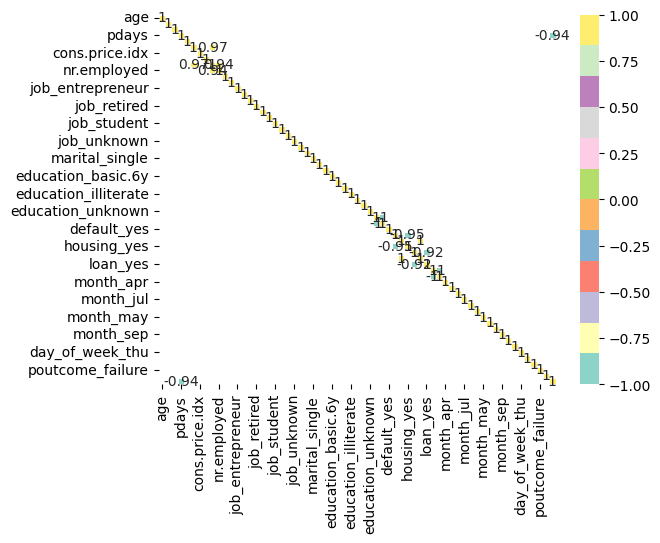

In [55]:
corr = final_input.corr()
print(corr)
corr = corr[abs(corr)>=0.90]
sns.heatmap(corr,annot=True,cmap='Set3',linewidths=0.5)
plt.show()

In [37]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test = train_test_split(final_input,df[target_var],test_size=0.25,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3089, 63)
(1030, 63)
(3089,)
(1030,)


In [41]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

def eval_model(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    print('Accuracy_Score',acc)
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))

def mscore(model):
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    print('Training Score',train_score)  
    print('Testing Score',test_score)

In [42]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dt.fit(x_train,y_train)



DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [43]:
mscore(dt)

Training Score 0.9268371641307867
Testing Score 0.9145631067961165


In [44]:
ypred_dt = dt.predict(x_test)
print(ypred_dt)

['no' 'no' 'yes' ... 'no' 'no' 'no']


In [45]:
eval_model(y_test,ypred_dt)

Accuracy_Score 0.9145631067961165
Confusion Matrix
 [[895  35]
 [ 53  47]]
Classification Report
               precision    recall  f1-score   support

          no       0.94      0.96      0.95       930
         yes       0.57      0.47      0.52       100

    accuracy                           0.91      1030
   macro avg       0.76      0.72      0.73      1030
weighted avg       0.91      0.91      0.91      1030



In [46]:
from sklearn.tree import plot_tree

In [47]:
cn = ['no','yes']
fn = x_train.columns
print(fn)
print(cn)


Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oc

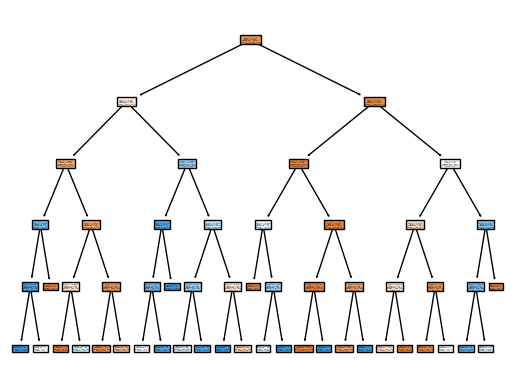

In [48]:
plot_tree(dt,class_names=cn,filled=True)
plt.show()

In [49]:
dt1 = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=15)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

In [50]:
mscore(dt1)

Training Score 0.9219812236969893
Testing Score 0.9174757281553398


In [51]:
ypred_dt1 = dt1.predict(x_test)

In [52]:
eval_model(y_test,ypred_dt1)

Accuracy_Score 0.9174757281553398
Confusion Matrix
 [[905  25]
 [ 60  40]]
Classification Report
               precision    recall  f1-score   support

          no       0.94      0.97      0.96       930
         yes       0.62      0.40      0.48       100

    accuracy                           0.92      1030
   macro avg       0.78      0.69      0.72      1030
weighted avg       0.91      0.92      0.91      1030



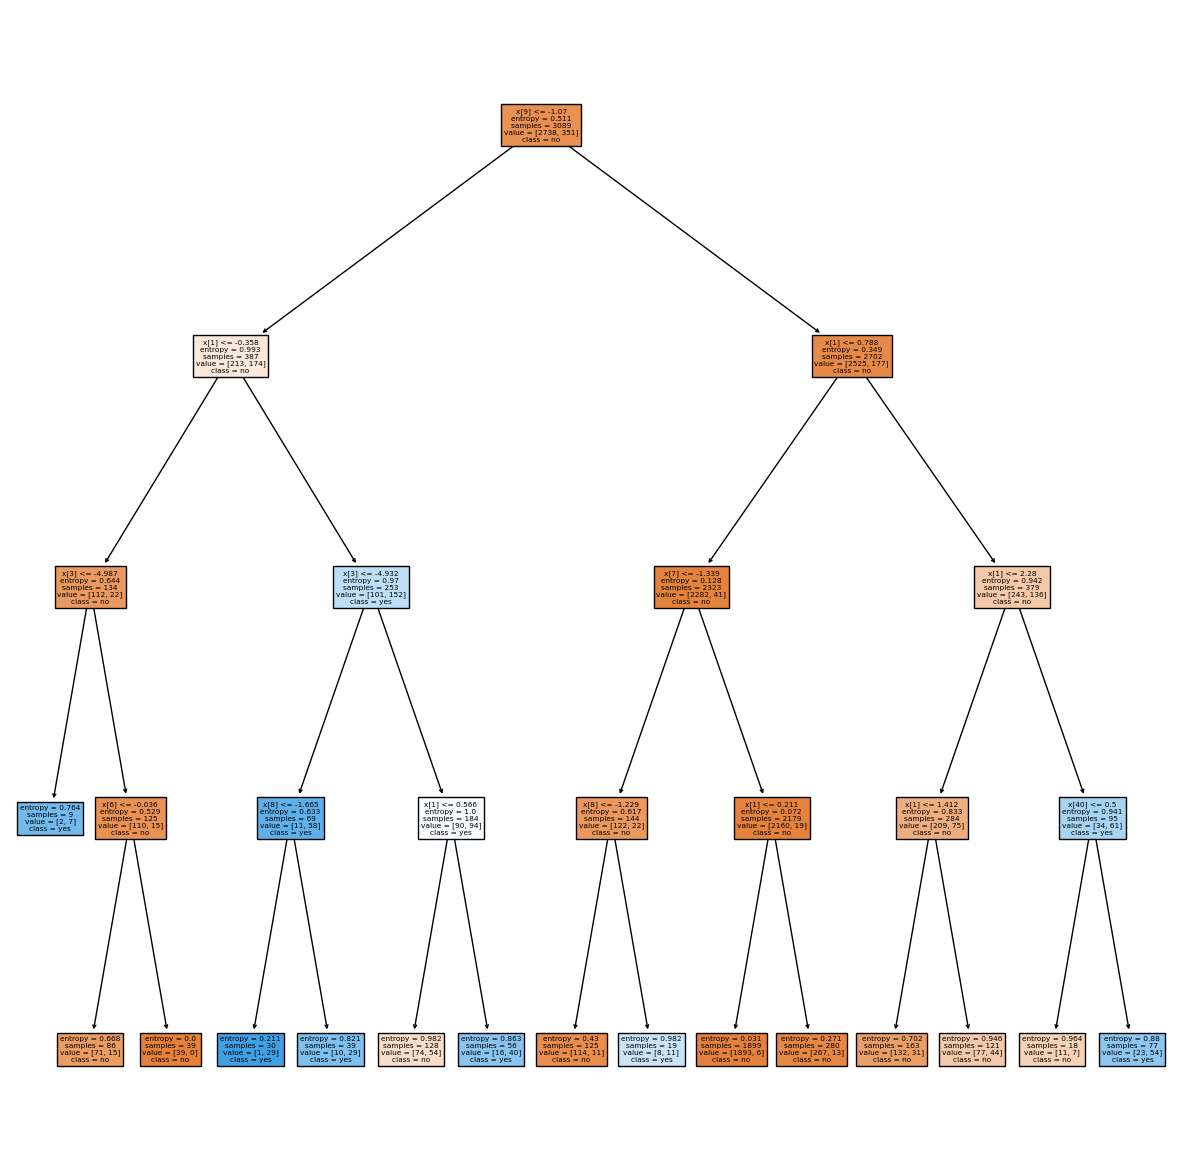

In [53]:
plt.figure(figsize=(15,15))
plot_tree(dt1,class_names=cn,filled=True)
plt.show()